In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%mkdir -p ../ressources/final_experiments/automode_datasets

In [3]:
import pandas as pd
import numpy as np
import pickle
import random
random.seed(42)
np.random.seed(42)

In [4]:
from pathlib import Path
datasets = [
    "automode_evaluated_seed14_n600.pickle",
    "automode_evaluated_seed15_n600.pickle",
    "automode_evaluated_seed16_n300_24-12-17_targetlights.pickle",
    "automode_evaluated_seed17_n600_24-12-20.pickle",
    "automode_evaluated_seed18_n600_24-12-23.pickle",
    "automode_evaluated_seed19_n600_24-12-24.pickle",
    "automode_evaluated_seed20_n600_25-01-16.pickle"
]

dataset_dir = Path("../ressources")

datasets = [dataset_dir / d for d in datasets]
datasets = [pd.read_pickle(d) for d in datasets]
combined_df = pd.concat(datasets, axis=0, ignore_index=True)
combined_df

,description,configuration,parameters,argos,behavior_tree,scores,avg_score
0,"In this setting, a circular arena with a radiu...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.269231, 0.192308, 0.230769, 0.269231, 0.307...",0.230769
1,The area is a rectangle with dimensions 4.76 x...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 2.0, 0.0, 0.0, ...",0.700000
2,The environment features a circle composed of ...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[2.0, 0.0, 1.0, 0.0, 1.0, 4.0, 0.0, 0.0, 1.0, ...",1.100000
3,The environment is constructed as a rectangula...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.375, 0.375, 0.3125, 0.4375, 0.375, 0.3125, ...",0.356250
4,The rectangular area has dimensions 3.38 m x 3...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[-8.91568, -5.62197, -8.21353, -6.31614, -7.41...",-7.377086
...,...,...,...,...,...,...,...
3895,"The rectangular space is 7.11 m long, 6.27 m w...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[0.304348, 0.304348, 0.434783, 0.434783, 0.608...",0.391305
3896,The area is a rectangle with dimensions 7.27 x...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[0.4, 0.36, 0.36, 0.4, 0.36, 0.28, 0.24, 0.36,...",0.332000
3897,The environment is constructed as a rectangula...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.904762, 0.666667, 0.714286, 0.666667, 0.761...",0.719048
3898,A circle with 24 walls forms the structure of ...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[-2.05816, -3.13608, -2.5613, -1.05903, -2.234...",-2.468775


In [ ]:
combined_df["type"] = combined_df["parameters"].map(lambda x: type(x.objective_params).__name__)
combined_df["lightstype"] = combined_df["parameters"].map(lambda x: type(x.lights_params).__name__)
combined_df["arenatype"] = combined_df["parameters"].map(lambda x: type(x.arena_params).__name__)
combined_df["robotstype"] = combined_df["parameters"].map(lambda x: type(x.robots_params).__name__)
combined_df.type.unique(), combined_df.lightstype.unique(), combined_df.arenatype.unique(), combined_df.robotstype.unique()

(array(['Aggregation', 'Foraging', 'Connection', 'Distribution'],
       dtype=object),
 array(['UniformLights', 'TargetLights'], dtype=object),
 array(['CircularArena', 'RectangularArena'], dtype=object),
 array(['CenteredSwarm'], dtype=object))

In [ ]:
num_rows_by_lightstype = combined_df.groupby("lightstype").size()
num_rows_by_lightstype

lightstype
TargetLights     1366
UniformLights    2534
dtype: int64

In [ ]:
num_scores_by_lightstype = combined_df.groupby("lightstype")["scores"].count()
num_scores_by_lightstype

lightstype
TargetLights     1276
UniformLights    2403
Name: scores, dtype: int64

In [ ]:
num_scores_by_lightstype / num_rows_by_lightstype

lightstype
TargetLights     0.934114
UniformLights    0.948303
dtype: float64

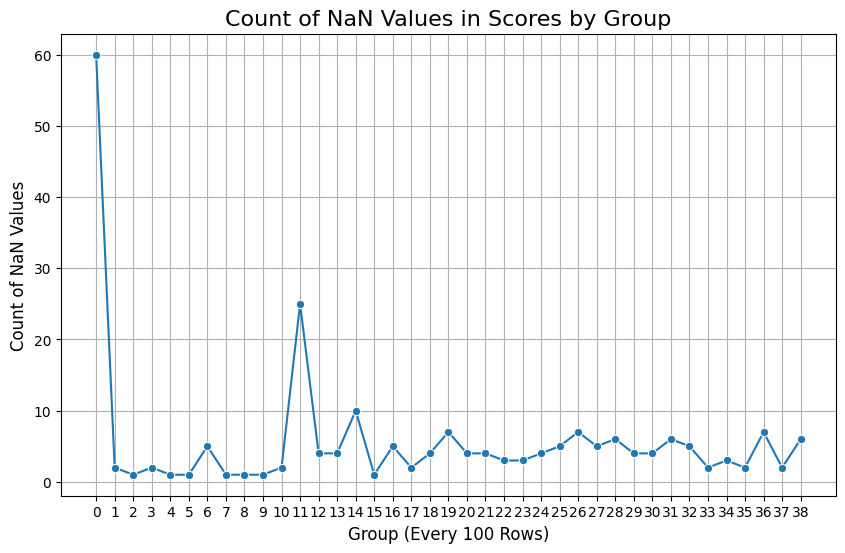

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(combined_df)


# Create a new column to group by every 100 rows
df['group'] = df.index // 100

# Count NaNs in the 'scores' column for each group
nan_counts = df.groupby('group')['scores'].apply(lambda x: x.isna().sum()).reset_index()

# Rename the columns for clarity
nan_counts.rename(columns={'scores': 'nan_count'}, inplace=True)

# Plot the NaN count as a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=nan_counts, x='group', y='nan_count', marker='o')

# Set titles and labels
plt.title('Count of NaN Values in Scores by Group', fontsize=16)
plt.xlabel('Group (Every 100 Rows)', fontsize=12)
plt.ylabel('Count of NaN Values', fontsize=12)
plt.xticks(nan_counts['group'])  # Set x-ticks to show all groups
plt.grid()

# Show the plot
plt.show()


## split into subdataframes I want to do experiments on

shuffle dataframe to avoid systimatic errors eventually done at specific times. also remove nan scores

In [10]:
shuffled_df = combined_df.dropna().sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_df.head()

,description,configuration,parameters,argos,behavior_tree,scores,avg_score,type,lightstype,arenatype,robotstype
0,"In this setting, a circular arena with a radiu...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[3.0, 0.0, 2.0, 2.0, 2.0, 5.0, 2.0, 2.0, 2.0, ...",2.000000,Foraging,UniformLights,CircularArena,CenteredSwarm
1,The arena has a radius of 2.56 m. At the black...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.636364, 0.818182, 0.727273, 0.727273, 0.727...",0.722727,Aggregation,TargetLights,CircularArena,CenteredSwarm
2,A circle with 22 walls forms the structure of ...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[-765.153, -836.942, -759.206, -574.368, -588....",-695.734300,Distribution,UniformLights,CircularArena,CenteredSwarm
3,"The circular arena, constructed with 23 walls,...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[-8.91405, -9.10293, -9.01547, -4.73986, -11.4...",-7.846834,Connection,UniformLights,CircularArena,CenteredSwarm
4,The rectangular area has dimensions 4.21 m x 4...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[-6.43396, -12.0499, -8.7878, -6.86525, -12.35...",-9.252782,Connection,UniformLights,RectangularArena,CenteredSwarm


### big experiment with increasing size

In [11]:

step = 0.1
ranges = list(np.arange(0,1,step))
ranges = [step + v.item() for v in ranges]
ranges

[0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7000000000000001,
 0.8,
 0.9,
 1.0]

In [ ]:
len(shuffled_df)

3662

In [13]:
n_validate = 500

df_validate = shuffled_df.iloc[:n_validate]  # First 250 entries
df_train = shuffled_df.iloc[n_validate:].iloc[:3000]  # Remaining entries

In [ ]:
increasing_size_dfs = [df_train.head(int(len(df_train) * range)) for range in ranges]
[len(d) for d in increasing_size_dfs]


[300, 600, 900, 1200, 1500, 1800, 2100, 2400, 2700, 3000]

In [15]:
df_validate.to_pickle(f"../ressources/final_experiments/automode_datasets/df_increasing_size_validate.pickle")

for df, size in zip(increasing_size_dfs,[len(d) for d in increasing_size_dfs]):
    df.to_pickle(f"../ressources/final_experiments/automode_datasets/df_increasing_size_{size}.pickle")

### aggregation color split

In [ ]:
def shorten_color_string(c):
    if c == "GroundColor.BLACK":
        return "black"
    else:
        return "white"
    
def map_agg_color(obj):
    if obj.objective_params.agg_target == 1:
        return str(obj.objective_params.ground_area_1.color)
    else:
        return str(obj.objective_params.ground_area_2.color)
    
agg_df = shuffled_df[shuffled_df.type == "Aggregation"].copy().reset_index()
agg_colors = agg_df.apply(lambda row: shorten_color_string(map_agg_color(row["parameters"])), axis=1)
agg_df = pd.concat([agg_df,agg_colors], axis=1).rename(columns={0: "target_color"})
agg_df.head()

,index,description,configuration,parameters,argos,behavior_tree,scores,avg_score,type,lightstype,arenatype,robotstype,target_color
0,1,The arena has a radius of 2.56 m. At the black...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.636364, 0.818182, 0.727273, 0.727273, 0.727...",0.722727,Aggregation,TargetLights,CircularArena,CenteredSwarm,black
1,9,"With a radius of 3.60 meters, the circular are...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 1 --n0 0 --nchild0 2 --...,"[0.166667, 0.111111, 0.555556, 0.222222, 0.388...",0.300000,Aggregation,UniformLights,CircularArena,CenteredSwarm,white
2,11,The environment is constructed as a rectangula...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.363636, 0.272727, 0.318182, 0.181818, 0.363...",0.322727,Aggregation,UniformLights,RectangularArena,CenteredSwarm,white
3,14,"With a length of 6.43 meters, width of 6.39 me...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[0.9375, 0.75, 0.8125, 0.9375, 0.875, 0.875, 0...",0.875000,Aggregation,TargetLights,RectangularArena,CenteredSwarm,white
4,17,"A rectangular area, with a length of 1.65 mete...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.9375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1....",0.987500,Aggregation,TargetLights,RectangularArena,CenteredSwarm,black


In [17]:
white_aggs = agg_df[agg_df.target_color == "white"].reset_index()
black_aggs = agg_df[agg_df.target_color == "black"].reset_index()
len(white_aggs), len(black_aggs)

(491, 458)

In [18]:
white_aggs[:450].to_pickle("../ressources/final_experiments/automode_datasets/df_aggregation_only_white.pickle")
black_aggs[:450].to_pickle("../ressources/final_experiments/automode_datasets/df_aggregation_only_black.pickle")

### guided env split

In [19]:
guided_env_exp_guided = shuffled_df[shuffled_df.lightstype == "TargetLights"].reset_index()
guided_env_exp_nonguided = shuffled_df[shuffled_df.lightstype != "TargetLights"].reset_index()

len(guided_env_exp_guided), len(guided_env_exp_nonguided)

(1261, 2401)

In [20]:
white_aggs[:1250].to_pickle("../ressources/final_experiments/automode_datasets/df_guided_uniform.pickle")
black_aggs[:1250].to_pickle("../ressources/final_experiments/automode_datasets/df_guided_targeted.pickle")

### leave one out (no aggregation)

In [21]:
df_loo_agg = shuffled_df[shuffled_df.type == "Aggregation"].reset_index()
df_loo_no_agg = shuffled_df[shuffled_df.type != "Aggregation"].reset_index()
len(df_loo_agg), len(df_loo_no_agg)

(949, 2713)

In [22]:
df_loo_agg.to_pickle("../ressources/final_experiments/automode_datasets/df_leaveoneout_agg.pickle")
df_loo_agg.to_pickle("../ressources/final_experiments/automode_datasets/df_leaveoneout_noagg.pickle")

### formal descriptions

In [23]:
df_formal = shuffled_df.copy()
df_formal["description"] = df_formal["configuration"]
print(df_formal.iloc[0].description)

<?xml version="1.00" ?>
<config>
  <swarm-elems>
    <entity quantity="21" max_trials="100">
      <e-puck id="epuck">
        <controller config="automode_bt"/>
      </e-puck>
    </entity>
  </swarm-elems>
  <env-elems>
    <light id="light_0" position="0.42,0.11,0.00" orientation="360,0,0" color="yellow" intensity="3.25" medium="leds"/>
    <light id="light_1" position="-0.71,1.10,0.00" orientation="360,0,0" color="yellow" intensity="4.26" medium="leds"/>
    <light id="light_2" position="-1.64,1.67,0.00" orientation="360,0,0" color="yellow" intensity="5.50" medium="leds"/>
    <box id="wall_0" size="0.01,5.40,0.10" movable="false">
      <body position="1.91,1.91,0" orientation="45.00,0,0"/>
    </box>
    <box id="wall_1" size="0.01,5.40,0.10" movable="false">
      <body position="-1.91,1.91,0" orientation="135.00,0,0"/>
    </box>
    <box id="wall_2" size="0.01,5.40,0.10" movable="false">
      <body position="-1.91,-1.91,0" orientation="-135.00,0,0"/>
    </box>
    <box id="

In [24]:
df_formal.to_pickle("../ressources/final_experiments/automode_datasets/df_formal_descriptions.pickle")

todo these splits should always be same size